In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_unmatched_TNG100 = pd.read_csv("../../dataset_raw/HSC_TNG100/label.csv")
df_unmatched_TNG50 = pd.read_csv("../../dataset_raw/HSC_TNG50/label.csv")
df_unmatched_HSC = pd.read_csv("../../dataset_raw/HSC/label.csv")

df = pd.read_csv("../../dataset/m_train.csv")
HSC_mask = df["dataset"] == 'HSC'
TNG50_mask = df["dataset"] == 'HSC_TNG50'
TNG100_mask = df["dataset"] == 'HSC_TNG100'
df_matched_HSC= df[HSC_mask]
df_matched_TNG50 = df[TNG50_mask]
df_matched_TNG100 = df[TNG100_mask]

In [2]:
HSC_label = ["photoz", "i_cmodel_mag_ge", "petro_90_light"]
TNG_label = ['z', 'i_band_mag_dust_apparent', 'petro_90_light']
label = ['Redshift', 'Apparent I-Band Magnitude [mag]', 'Petrosian $90 \%$ radius [pixel]']
limits = [[0.09, 0.41],[14,22],[0,100]]

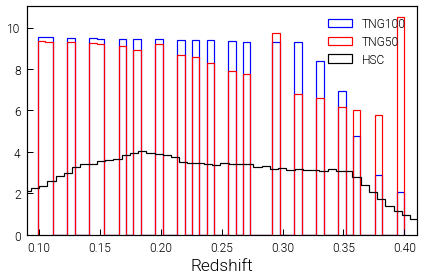

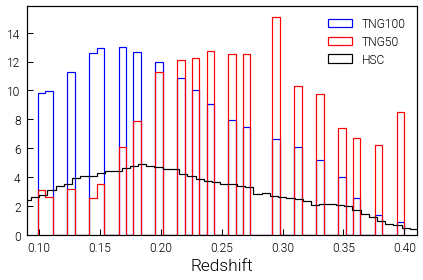

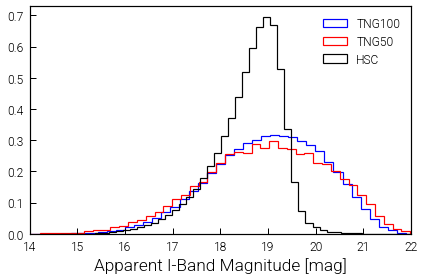

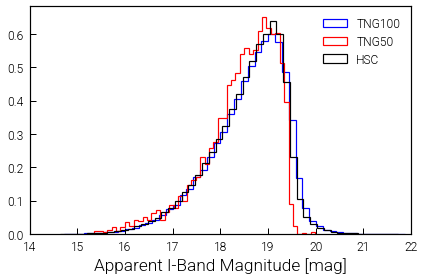

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/

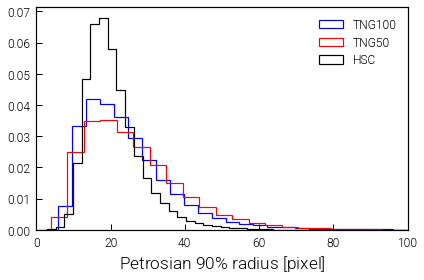

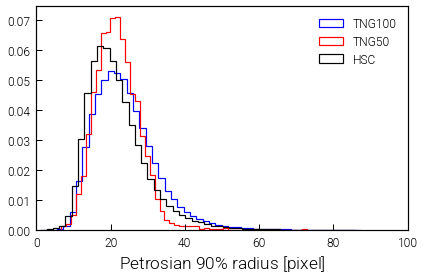

In [3]:
for hl, tl, l, lim in zip(HSC_label, TNG_label, label, limits):
    BINS = 50
    
    plt.hist(df_unmatched_TNG100[tl], density=True, label="TNG100", bins=BINS, histtype='step', edgecolor='blue', linewidth=1.2)
    plt.hist(df_unmatched_TNG50[tl], density=True, label="TNG50", bins=BINS, histtype='step', edgecolor='red', linewidth=1.2)
    plt.hist(df_unmatched_HSC[hl], density=True, label="HSC", bins=BINS, histtype='step', edgecolor='black', linewidth=1.2)
    plt.xlabel(l)
    plt.xlim(lim)
    plt.legend()
    plt.show()
    
    plt.hist(df_matched_TNG100[tl], density=True, label="TNG100", bins=BINS, histtype='step', edgecolor='blue', linewidth=1.2)
    plt.hist(df_matched_TNG50[tl], density=True, label="TNG50", bins=BINS, histtype='step', edgecolor='red', linewidth=1.2)
    plt.hist(df_matched_HSC[hl], density=True, label="HSC", bins=BINS, histtype='step', edgecolor='black', linewidth=1.2)
    plt.xlabel(l)
    plt.xlim(lim)
    plt.legend()
    plt.show()



/u/leisert/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


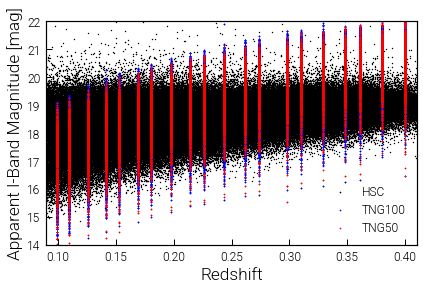

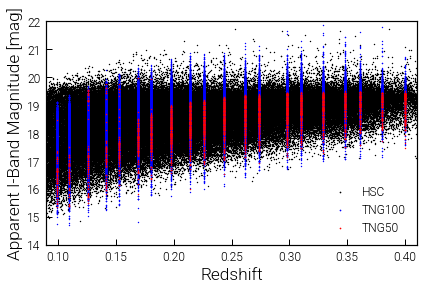

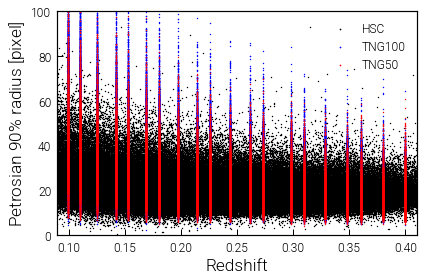

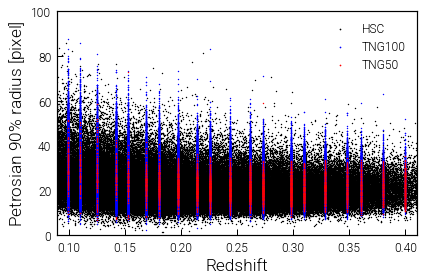

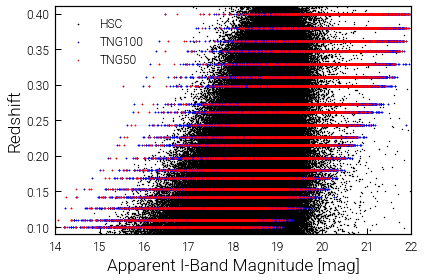

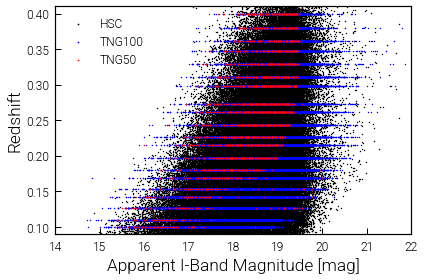

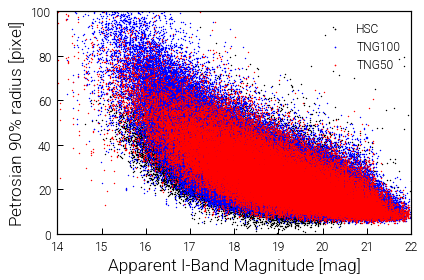

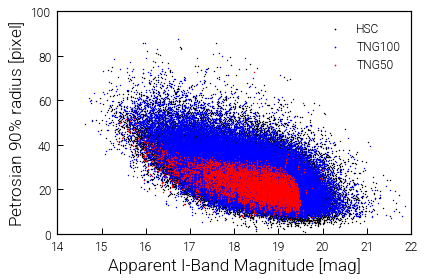

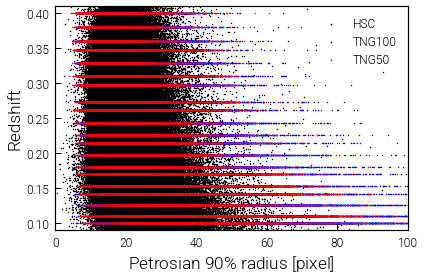

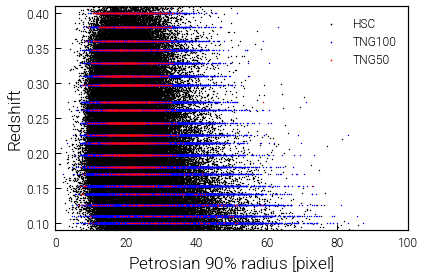

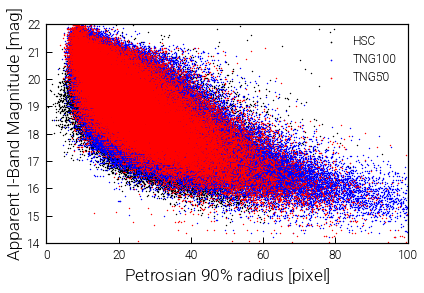

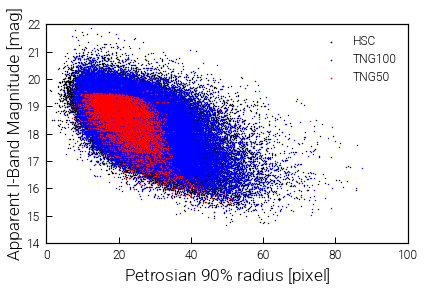

In [4]:
for xhl, xtl, xl, xlim in zip(HSC_label, TNG_label, label, limits):
    for yhl, ytl, yl, ylim in zip(HSC_label, TNG_label, label, limits):
        if xl == yl:
            continue
        
        plt.scatter(df_unmatched_HSC[xhl], df_unmatched_HSC[yhl], label="HSC", s=2, color='k')
        plt.scatter(df_unmatched_TNG100[xtl], df_unmatched_TNG100[ytl], label="TNG100", s=2, color='b')
        plt.scatter(df_unmatched_TNG50[xtl], df_unmatched_TNG50[ytl], label="TNG50", s=2, color='r')
        plt.xlabel(xl)
        plt.ylabel(yl)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()
        plt.show()
        
        plt.scatter(df_matched_HSC[xhl], df_matched_HSC[yhl], label="HSC", s=2, color='k')
        plt.scatter(df_matched_TNG100[xtl], df_matched_TNG100[ytl], label="TNG100", s=2, color='b')
        plt.scatter(df_matched_TNG50[xtl], df_matched_TNG50[ytl], label="TNG50", s=2, color='r')
        plt.xlabel(xl)
        plt.ylabel(yl)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()
        plt.show()